In [1]:
import pandas as pd

weather_df = pd.read_csv('weatherHistory.csv')

In [26]:
weather_df_num.head()

,Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars)
0,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13
1,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63
2,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94
3,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41
4,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51


In [2]:
import string

def gen_labels(n):
    alphabet_string = string.ascii_lowercase
    alphabet_list = list(alphabet_string)
    return alphabet_list[:n]

In [16]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression

weather_df.loc[weather_df['Precip Type']=='rain','Precip Type']=1
weather_df.loc[weather_df['Precip Type']=='snow','Precip Type']=0


weather_df_num=weather_df[list(weather_df.dtypes[weather_df.dtypes!='object'].index)]


weather_y = weather_df_num.pop('Temperature (C)')
weather_X = weather_df_num
train_X,test_X,train_y,test_y = train_test_split(weather_X,weather_y,test_size = 0.2,random_state=4)
# train_X = train_X[:1000].to_numpy()
# train_y = train_y[:1000].to_numpy()
# test_X = test_X[:200].to_numpy()
# test_y = test_y[:200].to_numpy()
#labels = gen_labels(len(train_X[0]))

In [22]:
train_X

,Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars)
70626,21.061111,0.31,12.5580,110.0,16.1000,0.0,1005.87
52457,25.016667,0.36,18.4989,352.0,10.3523,0.0,1025.36
90690,0.738889,0.89,17.1304,270.0,15.8263,0.0,1014.75
69528,13.772222,0.78,14.4900,300.0,15.8263,0.0,1014.56
92419,23.288889,0.82,6.3917,357.0,16.1000,0.0,1022.05
...,...,...,...,...,...,...,...
23346,6.783333,0.64,4.9427,316.0,9.9820,0.0,1012.35
11863,-1.600000,0.91,9.3541,181.0,4.8783,0.0,1027.02
92599,22.127778,0.59,3.1717,210.0,9.9820,0.0,1010.22
73902,22.666667,0.63,3.1878,240.0,16.1000,0.0,1013.33


,Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars)
70626,21.061111,0.31,12.5580,110.0,16.1000,0.0,1005.87
52457,25.016667,0.36,18.4989,352.0,10.3523,0.0,1025.36
90690,0.738889,0.89,17.1304,270.0,15.8263,0.0,1014.75
69528,13.772222,0.78,14.4900,300.0,15.8263,0.0,1014.56
92419,23.288889,0.82,6.3917,357.0,16.1000,0.0,1022.05
...,...,...,...,...,...,...,...
60553,12.733333,0.87,3.0751,200.0,14.9086,0.0,1016.31
52243,19.005556,0.73,8.1949,299.0,9.9820,0.0,1016.11
34741,26.111111,0.34,4.8300,100.0,9.9820,0.0,1025.80
36714,-2.872222,0.92,4.6851,320.0,3.5581,0.0,1019.40


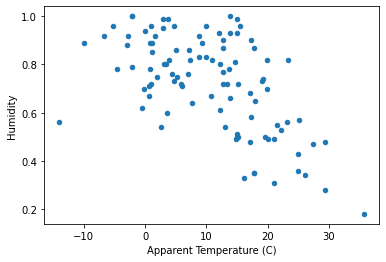

In [26]:
train_X[:100].plot.scatter(x='Apparent Temperature (C)', y='Humidity', style='o')
train_X[:100]

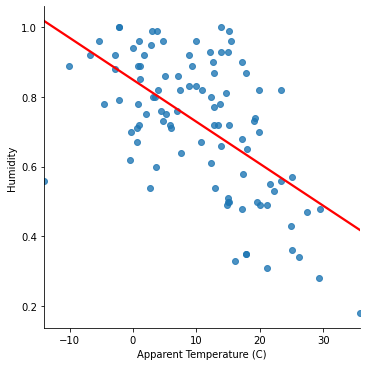

In [61]:
import seaborn as sns

sns.lmplot(x='Apparent Temperature (C)', y='Humidity', data=train_X[:100], ci=None, line_kws={'color': 'red'})

In [85]:
import math

newtrain = train_X[:100].to_numpy()
est = []
for sample in newtrain:
    sd = 1+ max(0, sample[1] - 9.377777777777778) + max(0, 9.377777777777778 - sample[1]) 
    est.append(sd)
est = np.sort(est)[::-1]


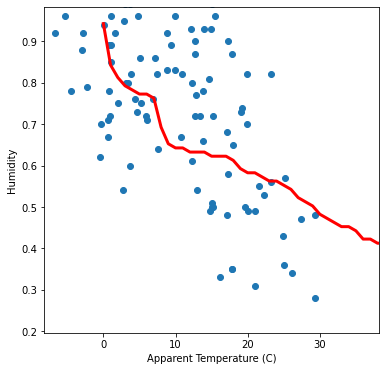

In [86]:
fig, ax = plt.subplots()
fig.set_size_inches(6,6)
ax.margins(x=-0.1, y=-0.02) 
ax.scatter(train_X[:100]['Apparent Temperature (C)'], train_X[:100]['Humidity'])
ax.plot((est - est.mean() + 0.4)[:45], linewidth=3, c='r')
ax.set_xlabel("Apparent Temperature (C)")
ax.set_ylabel("Humidity")
plt.show()

In [4]:
import pickle

from MARSModel import *

with open("model_aug.pickle", "rb") as infile:
    modeld = pickle.load(infile)
    model = modeld['model']
    coefs = modeld['c']

    res = evaluateModel(model, labels, coefs, test_X)




In [5]:
pd.DataFrame({'actual':test_y,
'prediction':res,
'diff':(test_y-res)})

,actual,prediction,diff
0,-14.142778,-3.156038,-10.986740
1,-2.992778,-0.846461,-2.146317
2,-2.048333,-2.091541,0.043208
3,15.368333,-1.186851,16.555184
4,5.851667,-1.924671,7.776338
...,...,...,...
145,14.529444,-0.627859,15.157303
146,8.990556,-0.627859,9.618414
147,-2.865000,-4.961880,2.096880
148,-9.770556,-2.856189,-6.914367


In [6]:
np.mean((res-test_y)**2)

103.36035158004405

In [51]:
from pyearth import Earth
from sklearn.metrics import mean_squared_error

er = Earth(max_degree=10)
er.fit(train_X, train_y)
print(mean_squared_error(test_y, er.predict(test_X)))

0.18206015497957942


In [8]:
from pyearth import export
from sympy import Add 
for symbol in list(export.export_sympy(er).free_symbols):
    print(Add(*[argi for argi in export.export_sympy(er).args if argi.has(symbol)]))

-0.00281525356540169*Max(0, -x0 - 169.17646568254)*Max(0, -x0 - 163.248687904762) - 0.0341121434783367*Max(0, -x0 - 163.248687904762)*Max(0, x0 + 169.17646568254) - 0.0273701366554455*Max(0, -x0 - 163.248687904762)*Max(0, -x2 - 165.283221238095) + 0.00711211613013149*Max(0, -x0 - 163.248687904762)*Max(0, x2 + 165.283221238095) - 0.724156048924842*Max(0, -x0 - 163.248687904762) + 1.02031701929533*Max(0, x0 + 163.248687904762)
-0.0273701366554455*Max(0, -x0 - 163.248687904762)*Max(0, -x2 - 165.283221238095) + 0.00711211613013149*Max(0, -x0 - 163.248687904762)*Max(0, x2 + 165.283221238095)


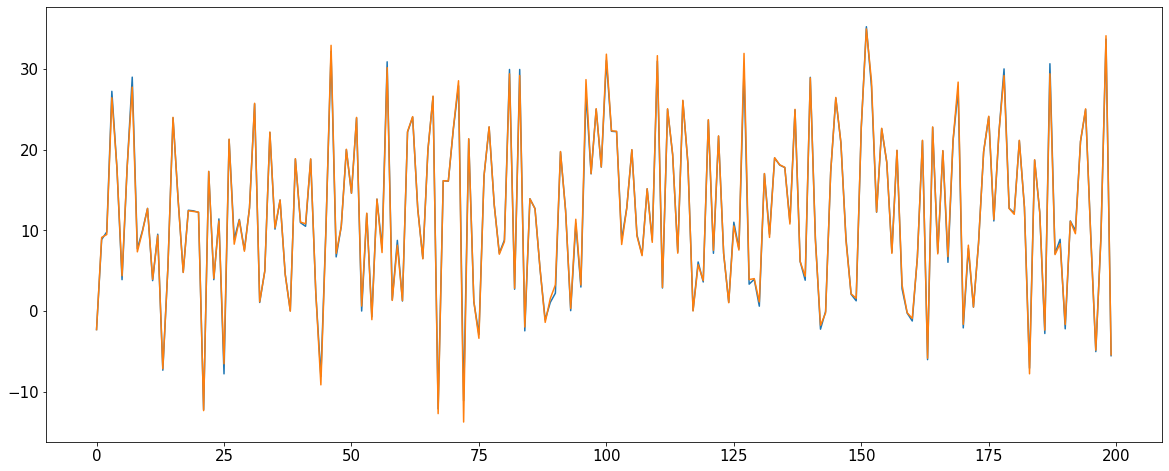

In [53]:
fig, ax = plt.subplots()
fig.set_size_inches(20,8)
ax.plot(test_y)
ax.plot(er.predict(test_X))

In [14]:
from MARS import runMARSBackward

with open("model_12.pickle", "rb") as infile:
        modeld = pickle.load(infile)
        print(modeld)
        print(getModelLength(modeld['model'], 1))
        removeHingeFromModel(modeld['model'], 14)
        model, coefs = runMARSBackward(modeld['model'], modeld['ssr'], train_X, labels, train_y, len(train_X), maxSplits=8)
        print(getModelLength(model))
        print(model)
        print(coefs)

        pred = evaluateModel(model, labels, coefs, test_X)
        diff = pred - test_y
        print(np.sum(np.power(diff, 2)) / len(test_y))
        print(pred)
        print(test_y)
        print(diff)

{'model': [[1, '', 0, True], [0, 'b', 0.97, True], [0, 'b', 0.97, False], [0, 'a', 7.444444444444445, True], [0, 'a', 7.444444444444445, False], [[0, 'a', 7.444444444444445, False], [0, 'd', 356.0, True]], [[0, 'a', 7.444444444444445, False], [0, 'd', 356.0, False]], [[0, 'a', 7.444444444444445, False], [0, 'd', 22.0, True]], [[0, 'a', 7.444444444444445, False], [0, 'd', 22.0, False]], [[0, 'b', 0.97, False], [0, 'e', 6.7781, True]], [[0, 'b', 0.97, False], [0, 'e', 6.7781, False]], [[0, 'b', 0.97, True], [0, 'a', -0.1611111111111106, True]], [[0, 'b', 0.97, True], [0, 'a', -0.1611111111111106, False]]], 'ssr': 15395.755547191178}
2
17.349988896542097
20
[[1, '', 0, True], [0, 'b', 0.97, True], [0, 'b', 0.97, False], [0, 'a', 7.444444444444445, True], [0, 'a', 7.444444444444445, False], [[0, 'a', 7.444444444444445, False], [0, 'd', 356.0, True]], [[0, 'a', 7.444444444444445, False], [0, 'd', 356.0, False]], [[0, 'a', 7.444444444444445, False], [0, 'd', 22.0, True]], [[0, 'a', 7.4444444

In [44]:
import matplotlib

matplotlib.rcParams.update({'font.size': 15})

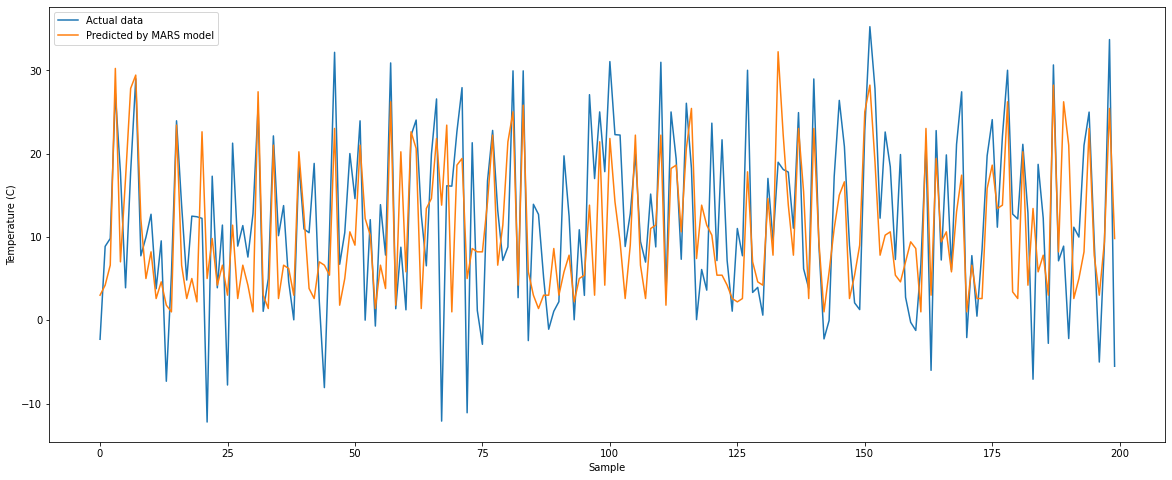

In [11]:
from matplotlib import pyplot as plt
fig, ax = plt.subplots()
fig.set_size_inches(20,8)
ax.plot(test_y, label="Actual data")
ax.plot(pred, label="Predicted by MARS model")
ax.set_xlabel("Sample")
ax.set_ylabel("Temperature (C)")
ax.legend()

In [72]:
df = pd.DataFrame({'actual':test_y,
'prediction': pred + 13})

<AxesSubplot:>

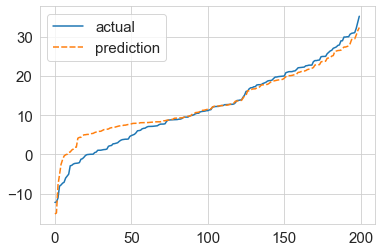

In [73]:
import seaborn as sns

sns.set_style('whitegrid')
sns.lineplot(data=df)

In [82]:
from sklearn import linear_model

res = LinearRegression(fit_intercept=True).fit(train_X, train_y)
predlin = res.predict(test_X)

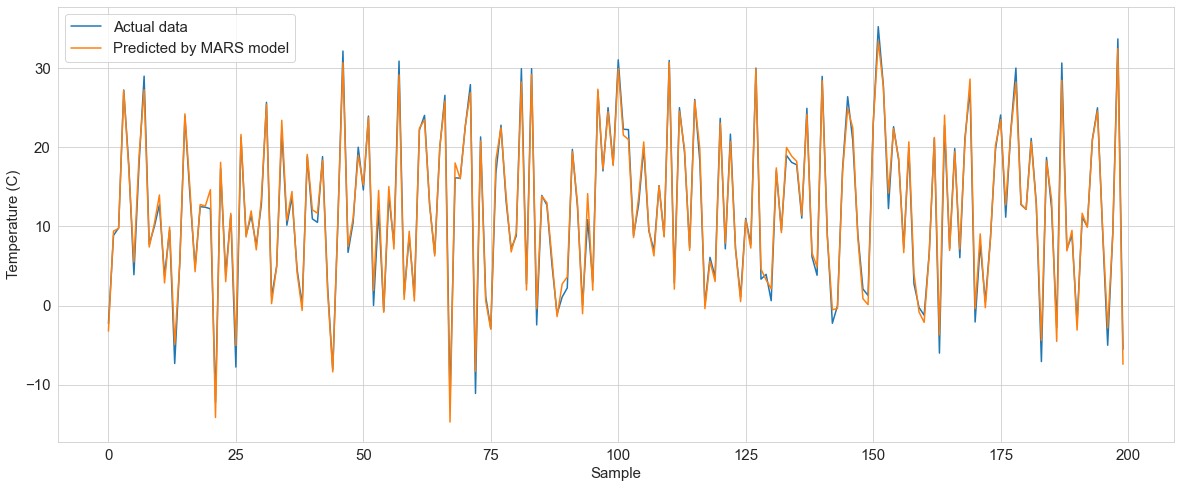

In [84]:
fig, ax = plt.subplots()
fig.set_size_inches(20,8)
ax.plot(test_y, label="Actual data")
ax.plot(predlin, label="Predicted by MARS model")
ax.set_xlabel("Sample")
ax.set_ylabel("Temperature (C)")
ax.legend()

In [13]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

mse = mean_squared_error(train_y[:200], pred + 13)
rsquared = r2_score(train_y[:200], pred + 13)
mae = mean_absolute_error(train_y[:200], pred + 13)
print(mse, rsquared, mae)

294.9313077724418 -2.9999219897285045 13.951819008479152


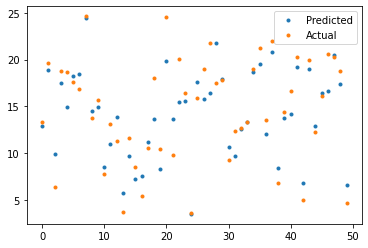

In [121]:
from sklearn.linear_model import LinearRegression

lg = LinearRegression().fit(X, y)
lgpred = lg.predict(sample)
plt.plot(lgpred, '.', label='Predicted')
plt.plot(ysamp, '.', label='Actual')
plt.legend()

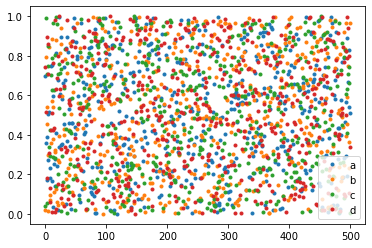

In [109]:
plt.plot(X[:,0], '.', label='a')
plt.plot(X[:,1], '.', label='b')
plt.plot(X[:,2], '.', label='c')
plt.plot(X[:,3], '.', label='d')
plt.legend()

In [ ]:
import seaborn as sns
sns.set_theme(style='whitegrid')
df = pd.DataFrame()


In [3]:
with open("model_2.pickle", "wb") as outfile:
    # "wb" argument opens the file in binary mode
    pickle.dump([models[1][0], models[1][1].components], outfile)

In [1]:
import sys
import string

import numpy as np
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_error

from MARS import runMARSForward, runMARSBackward

import logging
import pickle

from MARSModel import MARSModel

def gen_labels(n):
    alphabet_string = string.ascii_lowercase
    alphabet_list = list(alphabet_string)
    return alphabet_list[:n]

def computePrediction(X_test, model):
    y_pred = []
    for i in range(len(X_test)):
        obs = X_test[i]
        dic = {i: obs[i] for i in range(len(obs))}
        v = 0
        for c in model.components:
            hinge_values = {v: dic[v] for v in c.func.getVariables()}
            v += c.eval(hinge_values)
        y_pred.append(v)
    return y_pred

df = pd.read_json('ccpp.json')
X = df[['AT', 'V', 'AP', 'RH']].to_numpy()
y = df['PE'].to_numpy()
X = np.array(list(map(np.array, X)))
n = len(X[0])
X = X[:1000]
y = y[:1000]
labels = gen_labels(n)

rkf = KFold(n_splits=4, shuffle=True, random_state=2652124)
models = []
model = None
bmodel = None
for train_index, test_index in rkf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    model, ssr = runMARSForward(X_train, y_train, labels, n, maxSplits=14)
    bmodel = runMARSBackward(model, ssr, X_train, y_train, len(X_train), maxSplits=14)
    err = mean_absolute_error(y_test, computePrediction(X_test, bmodel))
    models.append((err, model, bmodel))
    model = None
    bmodel = None

print(models)


In [37]:
sampleind = np.random.choice(X.shape[0], 25, replace=False)
sample = X[sampleind, :]
ysamp = y[sampleind] + y.mean()
print(models[0][1])
pred = computePrediction(sample, models[0][1])

1.0 - 0.024813694987764076max(0,d - 0.008260637000000001) - .08875110180812934max(0,0.008260637000000001 - d) - .0052997802285444096max(0,d - 0.08934500070000001) + 0.8727409000997585max(0,0.08934500070000001 - d) - .07763380255755958max(0,b - 0.1516467453) - 0.15402911788866766max(0,0.1516467453 - b) 1.0 - 0.8687075988810662max(0,a - -2.1081902213) - 2.4180053739708427max(0,-2.1081902213 - a) - 3.6548850031969407max(0,d - 1.7582568229) - 0.8994962871130705max(0,1.7582568229 - d) + 0.24420296909467426max(0,d - 0.008260637000000001)max(0,b - 0.9969222362000001) - 0.023244981917256796max(0,d - 0.008260637000000001)max(0,0.9969222362000001 - b) + 0.46436828604592095max(0,b - 0.1516467453)max(0,a - 1.325569178) - 0.2753916300564294max(0,b - 0.1516467453)max(0,1.325569178 - a) - 13.25243662626206max(0,c - 3.3661643214) - .052920618896381166max(0,3.3661643214 - c) - 0.22083694008246188max(0,0.08934500070000001 - d)max(0,b - 0.8808258010000001) - .14218541444837376max(0,0.08934500070000001 - 

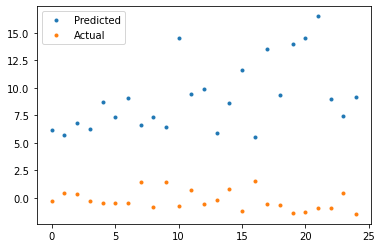

In [36]:
plt.plot(pred, '.', label='Predicted')
plt.plot(ysamp, '.', label='Actual')
plt.legend()

6.120441508710352


TypeError: __str__ returned non-string (type float)

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
pca_result = pca.fit_transform(X)

df = pd.DataFrame()

df['pca-one'] = pca_result[:,0]
df['pca-two'] = pca_result[:,1] 
df['pca-three'] = pca_result[:,2]
df['y'] = y

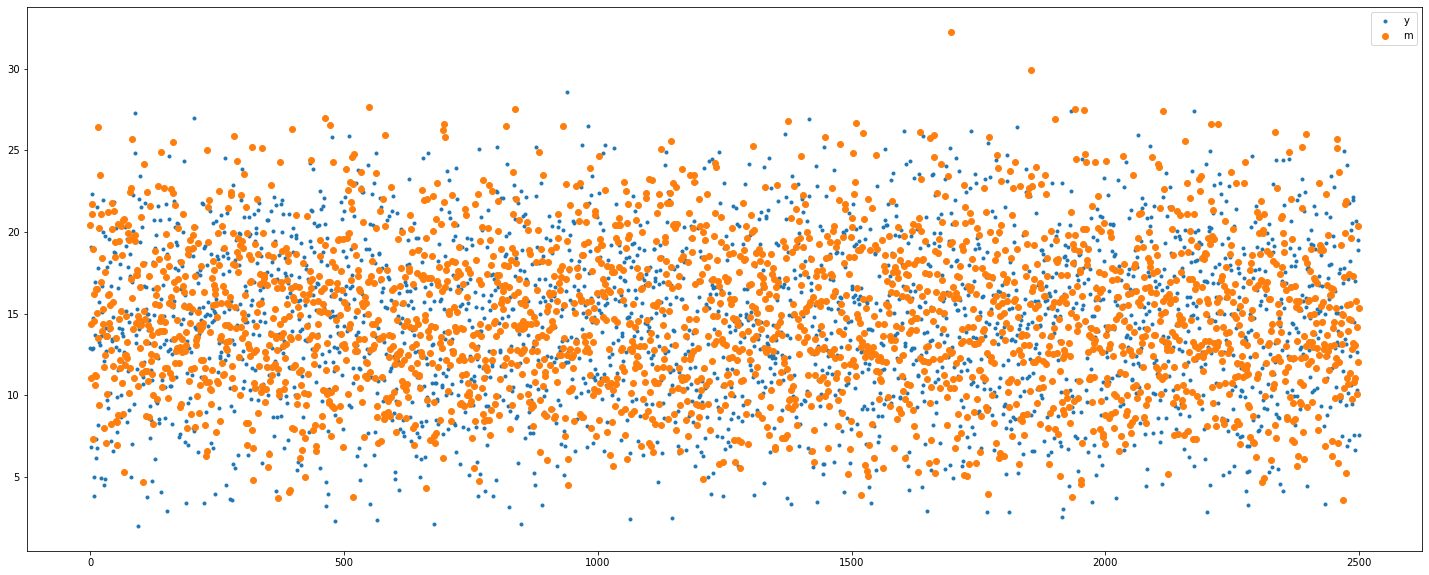

In [4]:
newmodelv = []
oldmodelv = []
for i in range(len(X)):
    obs = X[i]
    dic = {i: obs[i] for i in range(len(obs))}
    v = 0
    for c in newmodel.components:
        hinge_values = {v: dic[v] for v in c.func.getVariables()}
        v += c.eval(hinge_values)
    newmodelv.append(v)
    d = 0
    for c in old.components:
        hinge_values = {v: dic[v] for v in c.func.getVariables()}
        e = c.eval(hinge_values)
        d += e
    oldmodelv.append(d)

plt.figure(figsize=(25,10))
plt.plot(y, '.', label='y')
plt.plot(newmodelv, 'o', label='m')
plt.legend()

In [90]:
from sklearn.metrics import mean_absolute_error

mean_absolute_error(y, newmodelv)

4.486066308085652